<a href="https://colab.research.google.com/github/skarthi369/CODEaLPHA-PROJECT-/blob/main/A_B_TEST_ANALYZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
!pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.2 MB/s eta 0:00:00


In [15]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import pingouin

%matplotlib inline


In [16]:
from google.colab import files
uploaded = files.upload()

Saving control_group.csv to control_group (1).csv


In [17]:
from google.colab import files
uploaded = files.upload()

Saving test_group.csv to test_group (1).csv


In [19]:
# Convert each csv to dataframe
test = pd.read_csv('control_group (1).csv', delimiter = ';')
control = pd.read_csv('test_group (1).csv', delimiter = ';')


In [11]:
!pip install statsmodels==0.13.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.4 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.


In [20]:
test.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
control.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [22]:
# Concatenate the tables in a new dataframe
df = pd.concat([test, control], axis = 0)

# Reset the index
df = df.reset_index(drop = True)

In [23]:
df['Campaign Name'].isin(['Control Campaign', 'Test Campaign']).mean()


1.0

In [24]:
df.drop(['Reach', '# of Searches', '# of View Content', '# of Add to Cart'], axis=1, inplace=True)

In [25]:
df.head()


,Campaign Name,Date,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,7016.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,8110.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,6508.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,3065.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   # of Website Clicks  59 non-null     float64
 5   # of Purchase        59 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [27]:
df['Date'] = pd.to_datetime(df["Date"], dayfirst = True).dt.date

# Change 'Spend [USD]' from integer to float
df['Spend [USD]'] = df['Spend [USD]'].astype(float)

In [28]:
df.describe()



,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase
count,60.000000,59.000000,59.000000,59.000000
mean,2425.750000,91775.881356,5682.593220,522.000000
std,381.130461,32465.070636,1754.777559,196.973917
min,1757.000000,22521.000000,2277.000000,222.000000
25%,2073.750000,68853.500000,4227.500000,340.000000
50%,2420.500000,95843.000000,5691.000000,501.000000
75%,2727.500000,117315.000000,7218.500000,693.000000
max,3112.000000,145248.000000,8264.000000,890.000000


In [29]:
# Count the values in each categorical column
df['Campaign Name'].value_counts()

,count
Campaign Name,
Control Campaign,30
Test Campaign,30


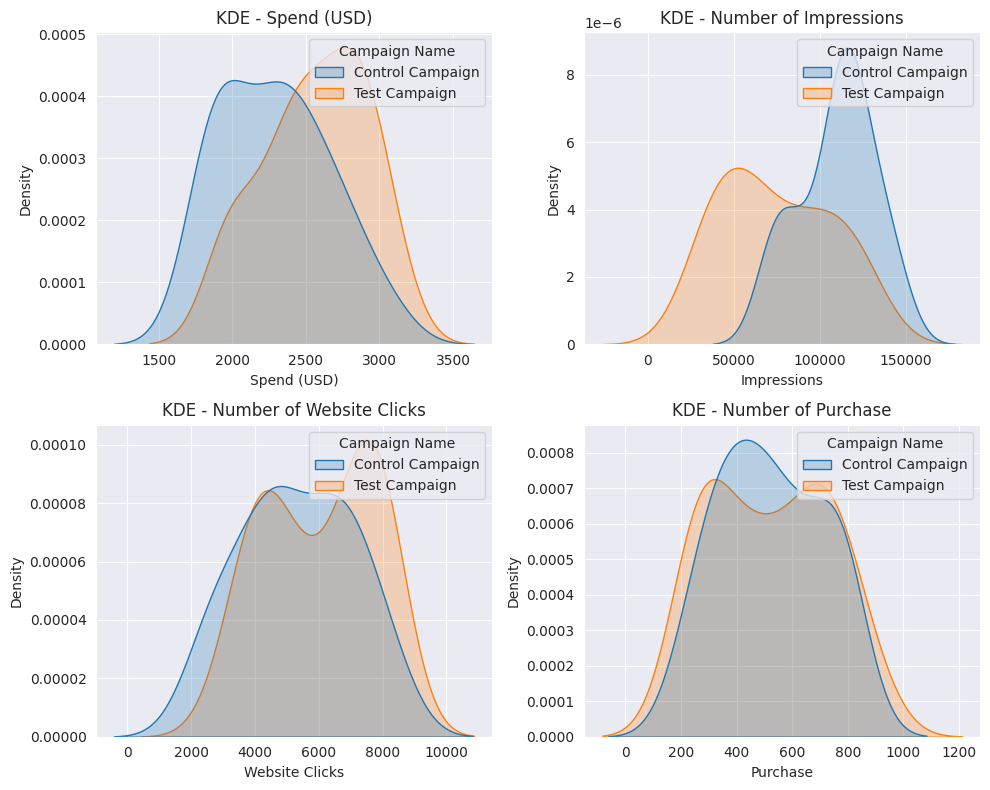

In [30]:
sns.set_style('darkgrid')

# Create a fig and axis for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Create a kde plot for each numerical variable
sns.kdeplot(data=df, x = 'Spend [USD]', ax=axes[0, 0], hue = 'Campaign Name', fill = True)
sns.kdeplot(data=df, x = '# of Impressions', ax=axes[0, 1], hue = 'Campaign Name', fill = True)
sns.kdeplot(data=df, x = '# of Website Clicks', ax=axes[1, 0], hue = 'Campaign Name', fill = True)
sns.kdeplot(data=df, x = '# of Purchase', ax=axes[1, 1], hue = 'Campaign Name', fill = True)

# Add labels and titles to each plot
axes[0, 0].set_xlabel("Spend (USD)")
axes[0, 0].set_ylabel("Density")
axes[0, 0].set_title("KDE - Spend (USD)")

axes[0, 1].set_xlabel("Impressions")
axes[0, 1].set_ylabel("Density")
axes[0, 1].set_title("KDE - Number of Impressions")

axes[1, 0].set_xlabel("Website Clicks")
axes[1, 0].set_ylabel("Density")
axes[1, 0].set_title("KDE - Number of Website Clicks")

axes[1, 1].set_xlabel("Purchase")
axes[1, 1].set_ylabel("Density")
axes[1, 1].set_title("KDE - Number of Purchase")

plt.tight_layout()

In [31]:
df[df.isnull().any(axis=1)]


,Campaign Name,Date,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase
4,Control Campaign,2019-08-05,1835.0,NaN,NaN,NaN


In [33]:
df.isna().sum()


,0
Campaign Name,0
Date,0
Spend [USD],0
# of Impressions,1
# of Website Clicks,1
# of Purchase,1


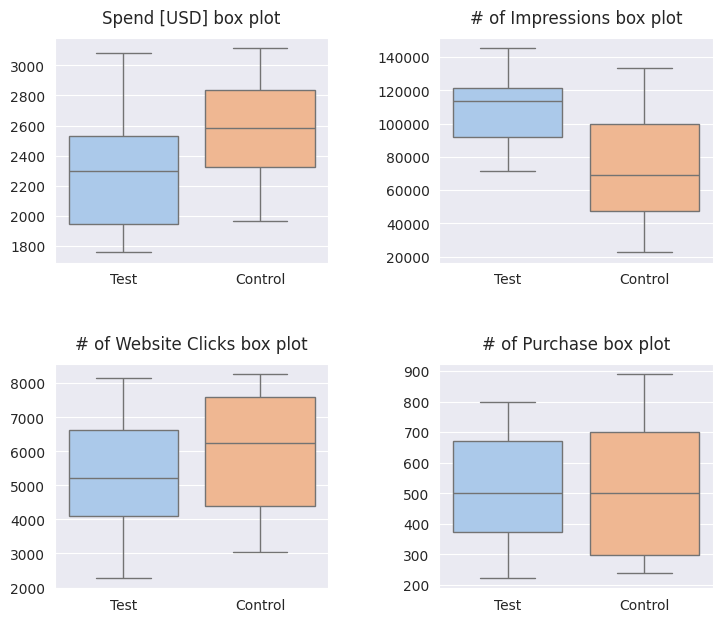

In [34]:
# Numerical columns from df I want to examine
num_vars = list(df.select_dtypes(include=np.number).columns)

# Create box plots for each variable in num_vars for outlier detection
n = 1

plt.figure(figsize= (8, 7))

for var in num_vars:
    # Select the subplot
    plt.subplot(2, 2, n)

    # Create the plot
    g = sns.boxplot(data=df, y=var, x= 'Campaign Name', palette = 'pastel')

    # Change titles and labels
    g.set_xlabel(None)
    g.set_ylabel(None)
    g.set_title(f'{var} box plot', y =1.03)
    plt.xticks(ticks=range(2), labels=['Test', 'Control'])

    # Go to the next subplot
    n = n + 1
    plt.tight_layout(pad = 3.5)

In [35]:
# Create a new colum and perform calculations for each metric
df['CTR'] = df['# of Website Clicks'] / df['# of Impressions']
df['CR'] = df['# of Purchase'] / df['# of Website Clicks']
df['CPC'] = df['Spend [USD]'] / df['# of Website Clicks']
df['CPA'] = df['Spend [USD]'] / df['# of Purchase']


# Show results
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase,CTR,CR,CPC,CPA
0,Control Campaign,2019-08-01,2280.0,82702.0,7016.0,618.0,0.084835,0.088084,0.324971,3.689320
1,Control Campaign,2019-08-02,1757.0,121040.0,8110.0,511.0,0.067003,0.063009,0.216646,3.438356
2,Control Campaign,2019-08-03,2343.0,131711.0,6508.0,372.0,0.049411,0.057160,0.360018,6.298387
3,Control Campaign,2019-08-04,1940.0,72878.0,3065.0,340.0,0.042057,0.110930,0.632953,5.705882
4,Control Campaign,2019-08-05,1835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


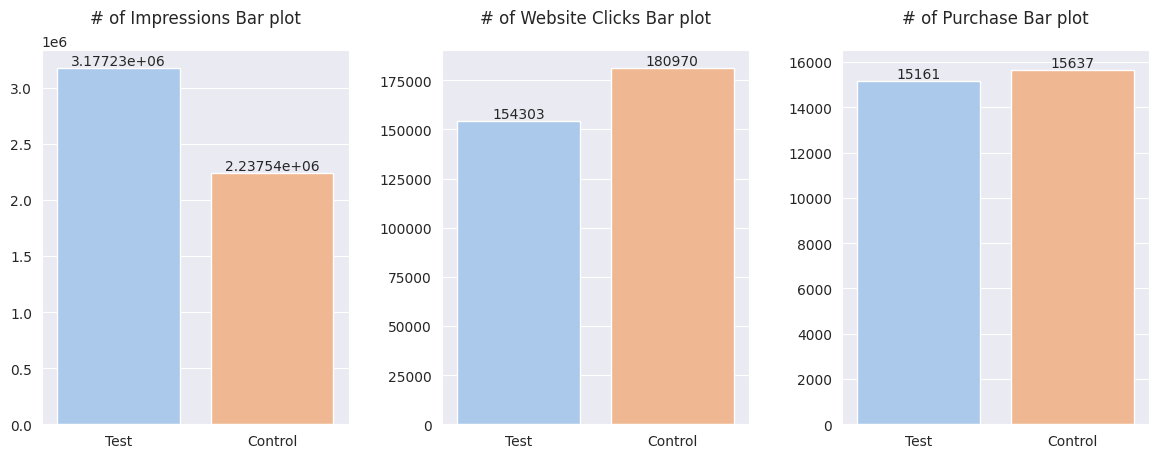

In [36]:
num_vars = ['# of Impressions', '# of Website Clicks', '# of Purchase']

# Create a bar plot for all variables in num_vars
n = 1

plt.figure(figsize= (12, 5))

for var in num_vars:
    # Select the subplot
    plt.subplot(1, 3, n)

    # Create the plot
    g = sns.barplot(data=df, y=var, x= 'Campaign Name', palette = 'pastel', estimator = 'sum', errorbar=('ci', False))

    # Change labels and titles
    g.set_xlabel(None)
    g.set_ylabel(None)
    g.set_title(f'{var} Bar plot', y =1.05)
    plt.xticks(ticks=range(2), labels=['Test', 'Control'])
    for i in g.containers:
        g.bar_label(i,)

    # Go to the next subplot
    n = n + 1
    plt.tight_layout(pad = 2.2)

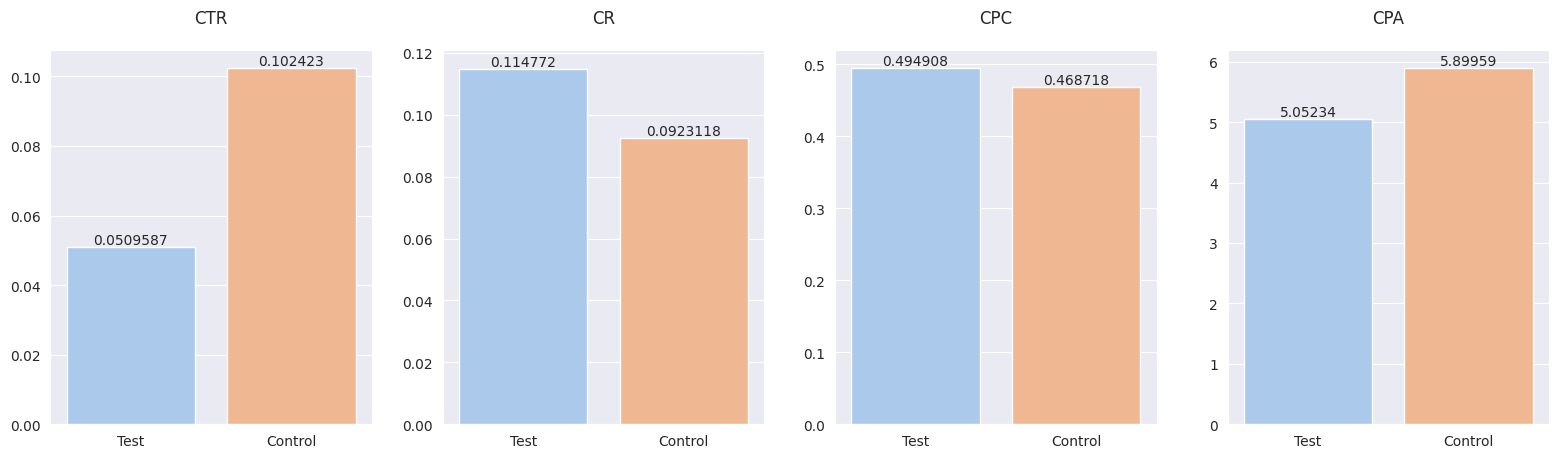

In [37]:
metrics = ['CTR', 'CR', 'CPC', 'CPA']

# Create a bar plot for each column in metrics
n = 1

plt.figure(figsize= (16, 5))

for m in metrics:
    # Select the subplot
    plt.subplot(1, 4, n)

    # Create the plot
    g = sns.barplot(data=df, y=m, x= 'Campaign Name', palette = 'pastel', estimator = 'mean', errorbar=('ci', False))

    # Change labels and titles
    g.set_xlabel(None)
    g.set_ylabel(None)
    g.set_title(f'{m}', y =1.05)
    plt.xticks(ticks=range(2), labels=['Test', 'Control'])
    for i in g.containers:
        g.bar_label(i,)

    # Go to the next subplot
    n = n + 1
    plt.tight_layout(pad = 2.2)

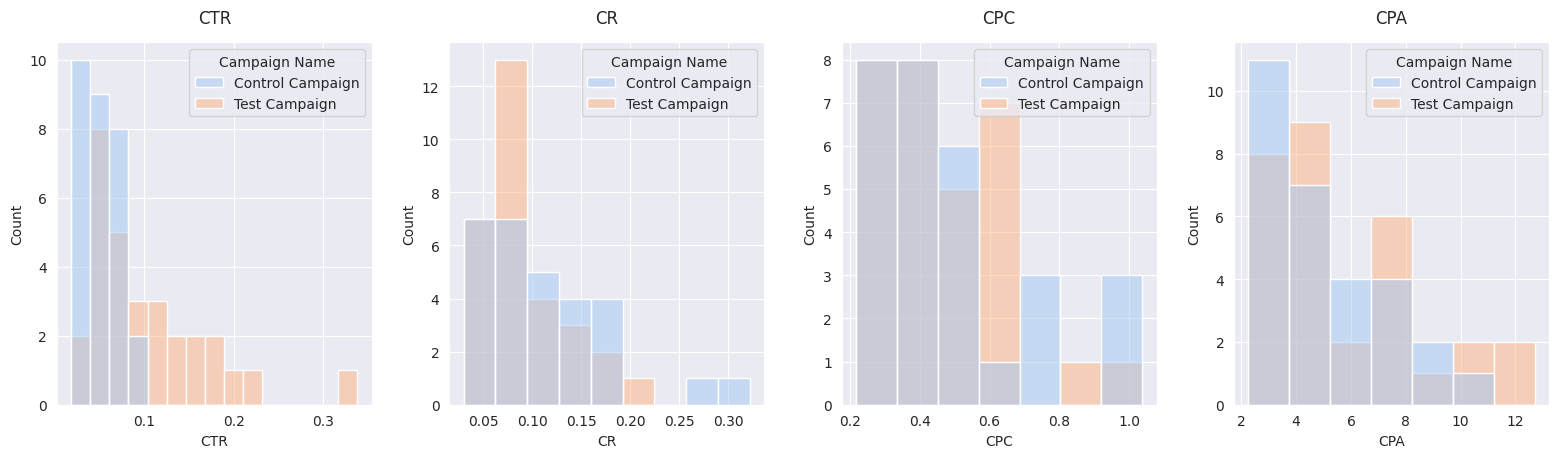

In [38]:
metrics = ['CTR', 'CR', 'CPC', 'CPA']

# Create a histogram for each column in metrics
n = 1

plt.figure(figsize= (16, 5))

for m in metrics:
    # Select the subplot
    plt.subplot(1, 4, n)

    # Create the plot
    g = sns.histplot(data=df, x=m,  palette = 'pastel', hue = 'Campaign Name')

    # Add a title
    g.set_title(f'{m}', y =1.03)

    # Go to the next subplot
    n = n + 1
    plt.tight_layout(pad = 2.2)

In [39]:
metrics = ['CTR', 'CR', 'CPC', 'CPA']

for m in metrics:

    # Use shapiro() function from scipy for the m metric
    result = shapiro(df[m])
    statistic = result[0]
    p_value = result[1]

    # Show the result
    print(f'{m} Shapiro-Wilk Test:\n')
    print(f'\t- Statistic: {statistic}')
    print(f'\t- P-value: {p_value}\n\n')

CTR Shapiro-Wilk Test:

	- Statistic: nan
	- P-value: nan


CR Shapiro-Wilk Test:

	- Statistic: nan
	- P-value: nan


CPC Shapiro-Wilk Test:

	- Statistic: nan
	- P-value: nan


CPA Shapiro-Wilk Test:

	- Statistic: nan
	- P-value: nan




In [40]:
# Create a function to perform Mann Whitney U Test on all metrics
def mann_whitney_u(metric, alpha):

    # Convert table to wide format using pivot
    df_wide = df.pivot(columns = 'Campaign Name', values = metric)

    # Use mwu from pingouin to perform the test
    test = pingouin.mwu(
                 x = df_wide['Control Campaign'],
                 y = df_wide['Test Campaign'],
                 alternative = 'two-sided'
                )

    # Save U-value and p-value from the test
    u_value = test.loc['MWU','U-val']
    p_value = test.loc['MWU', 'p-val'].round(5)

    # Print a result based on level of significance (alpha)
    print('\nMann Whitney U test for {}:\n'.format(metric))
    print(f'\t- p value is {p_value}\n')
    print(f'\t- U value is {u_value}\n')

    if p_value < alpha:
        print('\nWe reject the null hypothesis, there is sufficient evidence to affirm that there is a statistically significant difference between Control and Test {}.'.format(metric))

    else:
        print('\nWe fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test {}.'.format(metric))

In [41]:
mann_whitney_u(metric = 'CTR', alpha = 0.05)



Mann Whitney U test for CTR:

	- p value is 0.00025

	- U value is 193.0


We reject the null hypothesis, there is sufficient evidence to affirm that there is a statistically significant difference between Control and Test CTR.


In [42]:
mann_whitney_u(metric = 'CR', alpha = 0.05)



Mann Whitney U test for CR:

	- p value is 0.3061

	- U value is 503.0


We fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test CR.


In [43]:
mann_whitney_u(metric = 'CPC', alpha = 0.05)



Mann Whitney U test for CPC:

	- p value is 0.82599

	- U value is 450.0


We fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test CPC.


In [44]:
mann_whitney_u(metric = 'CPA', alpha = 0.05)



Mann Whitney U test for CPA:

	- p value is 0.27166

	- U value is 362.0


We fail to reject the null hypothesis, there is sufficient evidence to affirm that there is no statistically significant difference between Control and Test CPA.
